In Devito, an `Operator` carries out three fundamental tasks: generation of low-level code, JIT compilation, and execution. Overall, the lowering process performed by an `Operator` – from high-level equations to dynamically compiled and executable code – consists of multiple compiler passes, summarized in the Figure bellow. The following series of notebooks will expose those compilation stages.

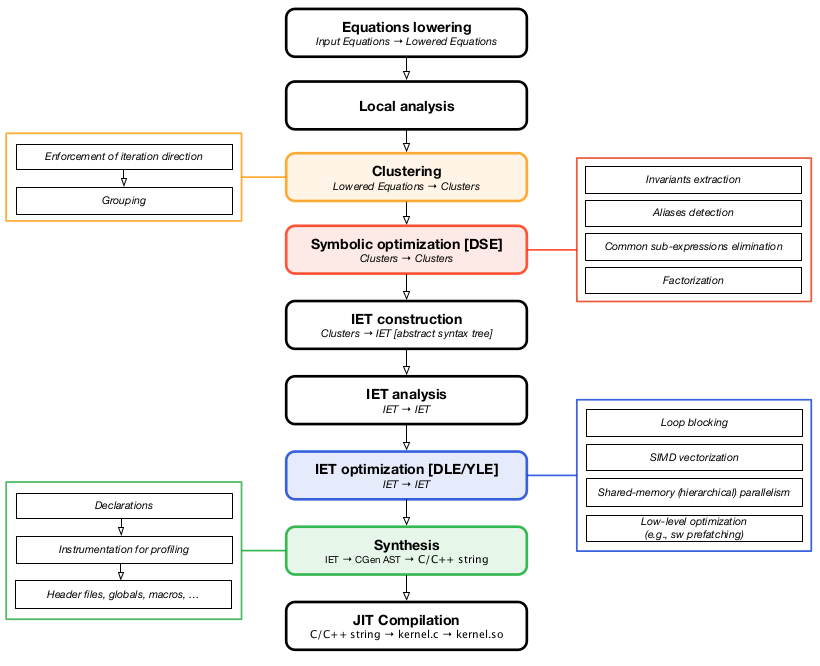

# Lowering

In the first pass, three main tasks are carried out: _indexification_, _substitution_, and _domain-alignment_.


### Indexification

The _indexification_ consists of converting functions into actual arrays of accesses. An access always keeps a reference to its originating functionf. For instance, all accesses to `u` such as `u[t, x + 1]` and `u[t + 1, x − 2]`would store a pointer to the same, user-defined `Function` _u(t, x)_. This metadata is exploited throughout the various compilation passes. 

To see this, let's create a `TimeFunction` named `u`.

In [1]:
from devito import Grid, TimeFunction
u = TimeFunction(name='u', grid=Grid((3,)), save=1)
u

u(time, x)

Note that `u` has one temporal dimension and one spacial dimension, that we will call `t` and `x` here, respectively.

In [2]:
t,x = u.dimensions
t,x

(time, x)

Indexifying functions allows us to write finite differences stencils from it. Functions (of type `Function`, `TimeFunction` and `SparceFunction`) can be indexified by the method `.indexify()`, as illustrated bellow.

In [3]:
u_i = u.indexify() # For more details about the method `indexify`, see `devito/symbolics/manipulation.py`
u_i

u[time, x]

Now, dimensions are read as indices.

In [4]:
u_i.indices == u.dimensions

True

And one can write accesses to `u` as:

In [5]:
u[t,x+1]

u[time, x + 1]

or as

In [6]:
u[t+1,x-2]

u[time + 1, x - 2]

Those accesses are obviously different, regarded that:

In [7]:
u[t,x+1].indices == u[t+1,x-2].indices

False

Thus

In [8]:
u[t,x+1] == u[t+1,x-2]

False

Yet, we can verify that those accesses still point to the very same `TimeFunction` object.

In [9]:
u[t,x+1].function == u[t+1,x-2].function 

True

Note also that there is no `data` associated with `Indexed` objects.

In [10]:
type(u_i)

devito.types.basic.Indexed

In [11]:
# u_i.data This should return an error!

The `data` representing the `grid` is accessed trought the `Function` that the indices point to.

In [12]:
u_i.function.data

Data([[0., 0., 0.]], dtype=float32)